In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("C:\Santhosh\AIML\Github\Machine-Learning\KNN\diabetes.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
features = data.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
features_zeros = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
#Pregnancies -- can be 0 but other values can't be zero --- they are missing values

features_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

In [9]:
data[features_zeros] = data[features_zeros].replace(0, np.nan)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BB7201B70>,
      dtype=object)

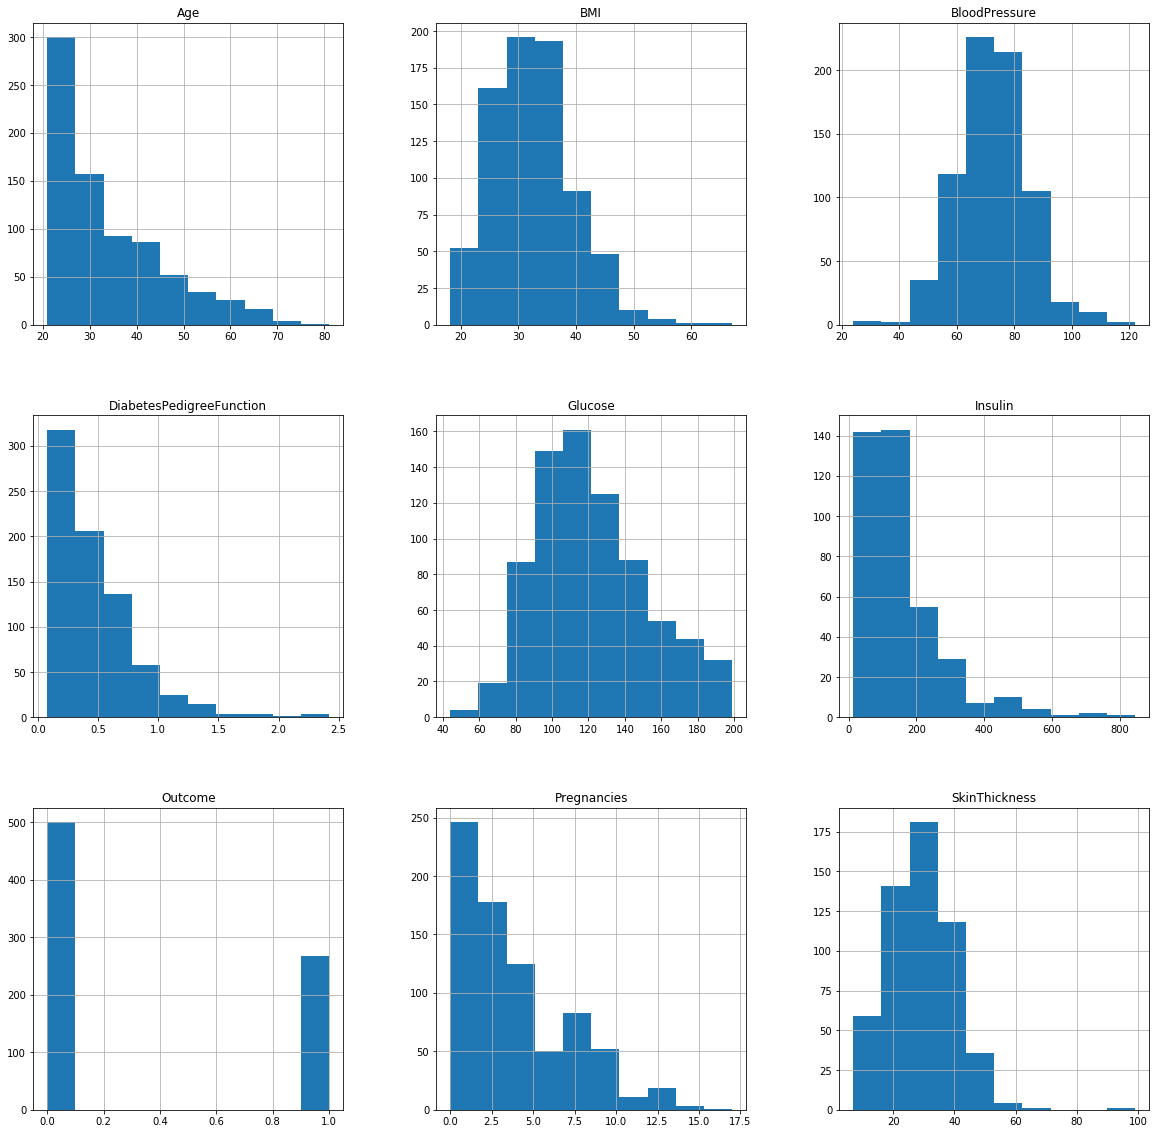

In [12]:
# Replace nan by looking into data distributions
data.hist(figsize = (20,20))

In [13]:
# replace with Mean or Meadian
features_zeros

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [14]:
# Replacing with median as data distribution is either left or right Skewed
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

In [15]:
# Replacing with mean as data looks normal distribution
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BB94E6C50>,
      dtype=object)

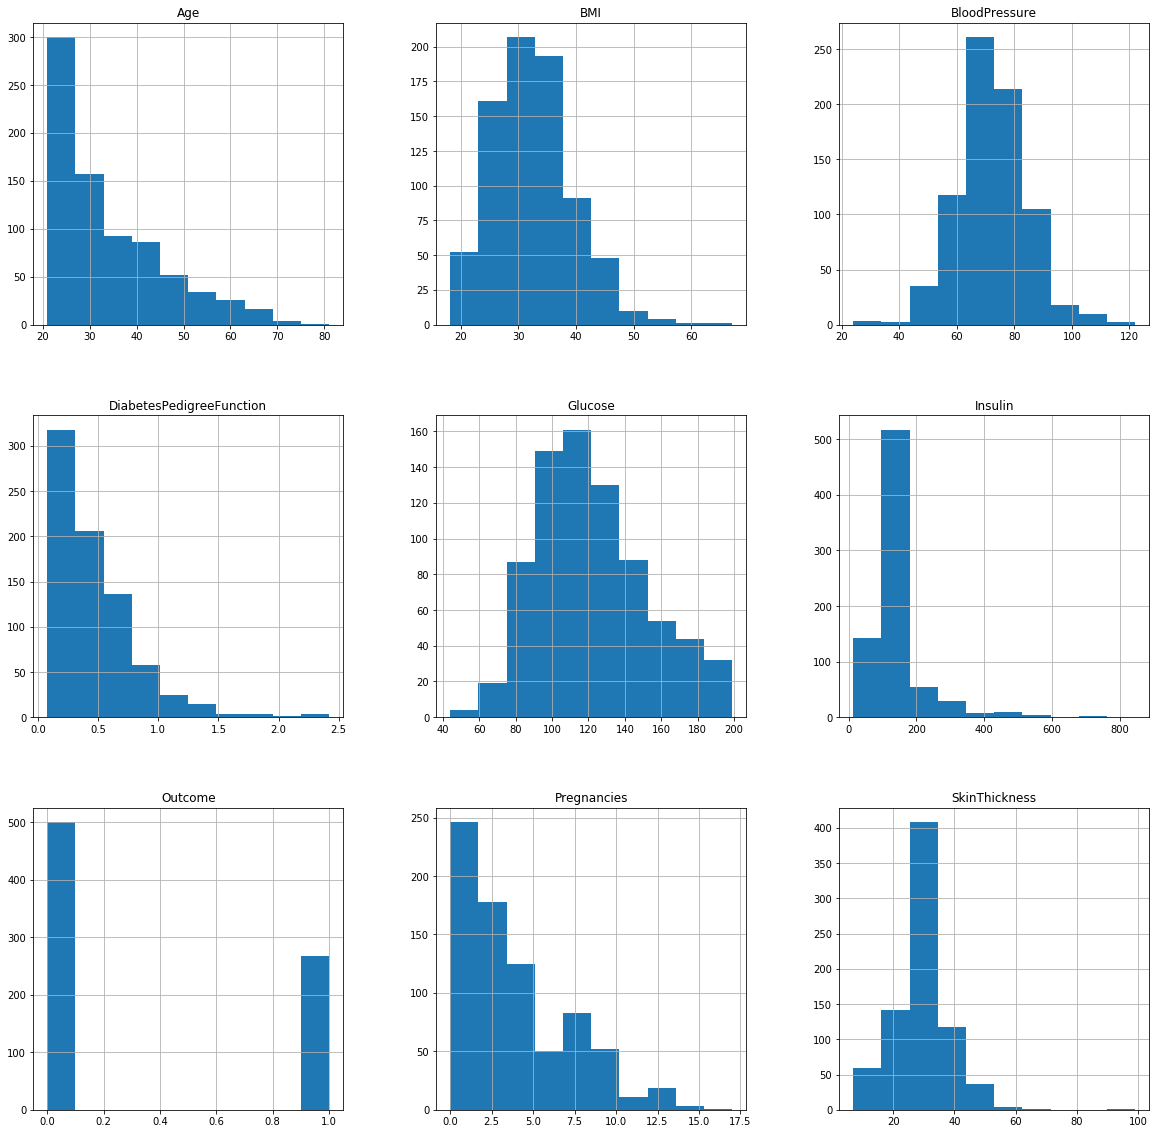

In [16]:
data.hist(figsize = (20,20))

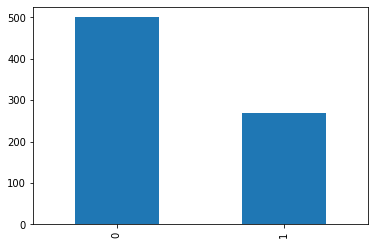

In [17]:
data['Outcome'].value_counts().plot(kind='bar')

In [18]:
print('Outcome 1 - ', data['Outcome'][data['Outcome']==1].count())
print('Outcome 0 - ', data['Outcome'][data['Outcome']==0].count())
print('Count - ', data['Outcome'].count())

Outcome 1 -  268
Outcome 0 -  500
Count -  768


In [19]:
# Data is more biased towards outcome 1

In [20]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [21]:
# split the data either using manual split -- 80% outcome(1) and 80% outcome(0)

In [22]:
data.shape

(768, 9)

In [23]:
data[data.Outcome==0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1     85.0      66.000000           29.0    125.0  26.6   
3              1     89.0      66.000000           23.0     94.0  28.1   
5              5    116.0      74.000000           29.0    125.0  25.6   
7             10    115.0      72.405184           29.0    125.0  35.3   
10             4    110.0      92.000000           29.0    125.0  37.6   
..           ...      ...            ...            ...      ...   ...   
762            9     89.0      62.000000           29.0    125.0  22.5   
763           10    101.0      76.000000           48.0    180.0  32.9   
764            2    122.0      70.000000           27.0    125.0  36.8   
765            5    121.0      72.000000           23.0    112.0  26.2   
767            1     93.0      70.000000           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
1                       0.351   31        0  
3                       0.167   21        0  
5                       0.201   30        0  
7                       0.134   29        0  
10                      0.191   30        0  
..                        ...  ...      ...  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
767                     0.315   23        0  

[500 rows x 9 columns]

In [24]:
outcome_1 = data[data['Outcome']==1]
outcome_0 = data[data['Outcome']==0]
train_1 = outcome_1.sample(frac=0.8)
train_0 = outcome_0.sample(frac=0.8)
train = pd.concat([train_1, train_0], axis =0)

In [25]:
train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
237            0    179.0           90.0           27.0    125.0  44.1   
159           17    163.0           72.0           41.0    114.0  40.9   
569            0    121.0           66.0           30.0    165.0  34.3   
701            6    125.0           78.0           31.0    125.0  27.6   
681            0    162.0           76.0           36.0    125.0  49.6   

     DiabetesPedigreeFunction  Age  Outcome  
237                     0.686   23        1  
159                     0.817   47        1  
569                     0.203   33        1  
701                     0.565   49        1  
681                     0.364   26        1

In [26]:
test = data.loc[~data.index.isin(train.index)]

In [27]:
test.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0    125.0  33.6   
6             3     78.0           50.0           32.0     88.0  31.0   
12           10    139.0           80.0           29.0    125.0  27.1   
24           11    143.0           94.0           33.0    146.0  36.6   
26            7    147.0           76.0           29.0    125.0  39.4   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
6                      0.248   26        1  
12                     1.441   57        0  
24                     0.254   51        1  
26                     0.257   43        1

In [28]:
X_train = train.drop(['Outcome'], axis =1)
Y_train = train['Outcome']
X_test = test.drop(['Outcome'], axis =1)
Y_test = test['Outcome']

In [29]:
features = X_train.columns

In [30]:
#scale the data -- standard scaling
for feature in features:
    mean = X_train[feature].mean()
    std = X_train[feature].std()
    X_train[feature] = (X_train[feature] - mean)/std
    X_test[feature] = (X_test[feature] -mean)/std
    
    

In [31]:
X_train.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
237    -1.144681  1.895549       1.430354      -0.248735 -0.165579  1.676755   
159     3.877672  1.368733      -0.045998       1.301756 -0.298239  1.212213   
569    -1.144681 -0.014160      -0.538116       0.083513  0.316820  0.254094   
701     0.627914  0.117544       0.446119       0.194262 -0.165579 -0.718542   
681    -1.144681  1.335807       0.282080       0.748009 -0.165579  2.475188   

     DiabetesPedigreeFunction       Age  
237                  0.652964 -0.863477  
159                  1.056635  1.173699  
569                 -0.835382 -0.014654  
701                  0.280107  1.343463  
681                 -0.339267 -0.608830

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(3,100):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [34]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 84.69055374592834 % and k = [1]


In [40]:
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.51948051948052 % and k = [67, 74, 75]


In [43]:
print(test_scores)

[0.7077922077922078, 0.7272727272727273, 0.7402597402597403, 0.7532467532467533, 0.7532467532467533, 0.7532467532467533, 0.7402597402597403, 0.7662337662337663, 0.7727272727272727, 0.7597402597402597, 0.7662337662337663, 0.7727272727272727, 0.7792207792207793, 0.7467532467532467, 0.7727272727272727, 0.7662337662337663, 0.7662337662337663, 0.7337662337662337, 0.7727272727272727, 0.7532467532467533, 0.7467532467532467, 0.7532467532467533, 0.7402597402597403, 0.7597402597402597, 0.7597402597402597, 0.7532467532467533, 0.7467532467532467, 0.7662337662337663, 0.7597402597402597, 0.7727272727272727, 0.7662337662337663, 0.7662337662337663, 0.7727272727272727, 0.7727272727272727, 0.7662337662337663, 0.7467532467532467, 0.7597402597402597, 0.7597402597402597, 0.7467532467532467, 0.7597402597402597, 0.7662337662337663, 0.7597402597402597, 0.7727272727272727, 0.7597402597402597, 0.7532467532467533, 0.7597402597402597, 0.7467532467532467, 0.7467532467532467, 0.7597402597402597, 0.7597402597402597,

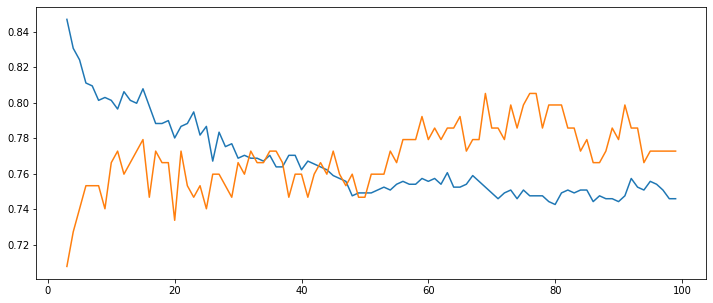

In [45]:
plt.figure(figsize=(12,5))
sns.lineplot(range(3,100), train_scores)
sns.lineplot(range(3,100), test_scores)

In [46]:
#conside k = 35

In [47]:
knn = KNeighborsClassifier(35)

In [49]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [55]:
print('Train score for K-35 :', knn.score(X_train, Y_train)*100)
print('Train score for K-35 :',knn.score(X_test, Y_test)*100)

Train score for K-35 : 77.0358306188925
Train score for K-35 : 77.27272727272727
